# **COVID 19 PROJECT**

# **Part 3: Time Series Analysis**

#**Predict number of Covid 19 cases in Canada in the next 14 days**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
Canada = pd.read_csv('/content/Canada_data.csv')

In [8]:
Canada.head()

,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,people_fully_vaccinated,population
0,North America,Canada,2020-01-26,1.0,1.0,0.0,0.0,0.0,0.0,38067913.0
1,North America,Canada,2020-01-27,1.0,0.0,0.0,0.0,0.0,0.0,38067913.0
2,North America,Canada,2020-01-28,2.0,1.0,0.0,0.0,0.0,0.0,38067913.0
3,North America,Canada,2020-01-29,2.0,0.0,0.0,0.0,0.0,0.0,38067913.0
4,North America,Canada,2020-01-30,2.0,0.0,0.0,0.0,0.0,0.0,38067913.0


In [9]:
Canada.shape

(728, 10)

In [10]:
# convert 'date' from object to datetime for better visualization
Canada['date'] = pd.to_datetime(Canada['date'])

In [11]:
#set number formatting
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
# Plotting new cases and new deaths in Canada
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=Canada.index, y=Canada['new_cases'], mode='lines+markers', name='New Cases'))
fig.add_trace(go.Scatter(x=Canada.index, y=Canada['new_deaths'], mode='lines+markers', name='New Deaths'))
fig.update_layout(title="Trend of new cases and new deaths in Canda",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In this part, I will focus on predicting 'new_cases' attribute, so I will create a new data frame which includes date and new_cases for further analysis.

In [13]:
df = Canada.loc[:,['date', 'new_cases']]
df.head()

,date,new_cases
0,2020-01-26,1.00
1,2020-01-27,0.00
2,2020-01-28,1.00
3,2020-01-29,0.00
4,2020-01-30,0.00


In [14]:
df.tail()

,date,new_cases
723,2022-01-18,"13,832.00"
724,2022-01-19,"16,849.00"
725,2022-01-20,"15,775.00"
726,2022-01-21,"15,822.00"
727,2022-01-22,"8,039.00"


In [15]:
len(df)

728

##**Prediction using Machine Learning Models**

Assign X, y and create forecast data frame

In [16]:
X = np.arange(len(df['date'])).reshape(-1,1)
X.shape

(728, 1)

In [17]:
# Target attribute
y = np.array(df['new_cases']).reshape(-1,1)
y.shape

(728, 1)

In [18]:
forecast = np.arange(len(df['date']) + 14 ).reshape(-1,1)
forecast.shape

(742, 1)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text major ticklabel objects>)

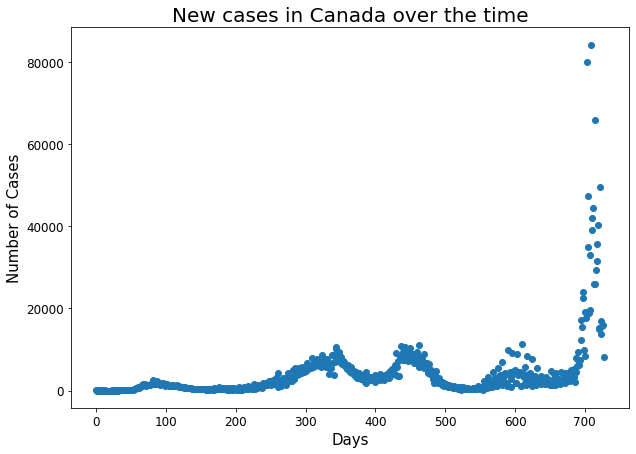

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X,y)
plt.title("New cases in Canada over the time", size = 20)
plt.xlabel('Days', size = 15)
plt.ylabel('Number of Cases', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)

From this scatter plot, we can see that X and y has non-linear relationship.

**Modeling**


Now let's apply some machine learning models and time series forcasting models to our prepared data then compare RMSE to find the optimal model.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit.

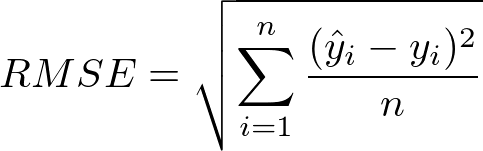

In [20]:
# train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False, random_state = 42)

###Polynomial Regression Model

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y

In [22]:
# looking for best degree for deaths
rmse = 100000
degree = 0
for i in range(101):
    # Transform our death data for polynomial regression
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=i)
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)
    poly_forcast = poly.fit_transform(forecast)

    # polynomial regression deaths
    from sklearn.linear_model import LinearRegression
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(poly_X_train, y_train)
    test_linear_pred = linear_model.predict(poly_X_test)
    linear_pred = linear_model.predict(poly_forcast)

     # evaluating with RMSE
    from sklearn.metrics import mean_squared_error
    rm = np.sqrt(mean_squared_error(test_linear_pred,y_test))
    if(rm<rmse):
        rmse = rm
        degree = i
    if(i==100):
        print('the best RMSE:',round(rmse,2))
        print('the optimal degree:',degree)

the best RMSE: 15566.39
the optimal degree: 5


Now that we already have the optimal degree for polynomial regression model, let's put into poly.fit again and transform our data for polynomial regression.

In [23]:
# Transform our cases data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_forecast = poly.fit_transform(forecast)

Training, predicting and evaluating polynomial regression into confirmed cases

In [24]:
# Training, predicting polynomial regression into new cases
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_linear_pred = linear_model.predict(poly_X_test)
linear_pred = linear_model.predict(poly_forecast)

# evaluating with RMSE
RMSE_poly=np.sqrt(mean_squared_error(test_linear_pred,y_test) )
print('RMSE_poly:', RMSE_poly)

RMSE_poly: 15566.393572108722


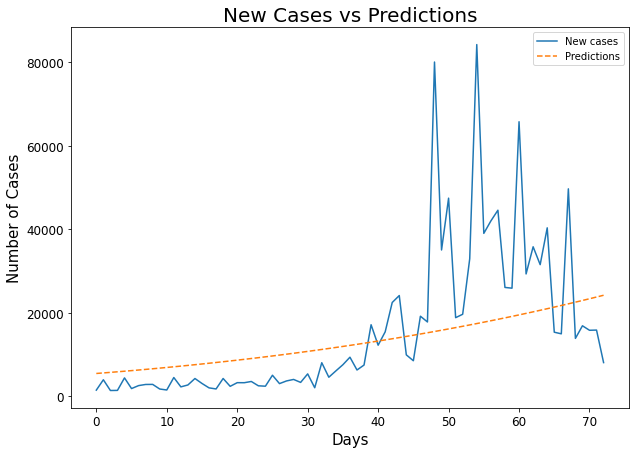

In [25]:
plt.figure(figsize=(10,7))
plt.plot(y_test, label = "New cases")
plt.plot(test_linear_pred, label = "Predictions",linestyle='dashed')
plt.title("New Cases vs Predictions", size = 20)
plt.xlabel('Days', size = 15)
plt.ylabel('Number of Cases', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['New cases', 'Predictions']);

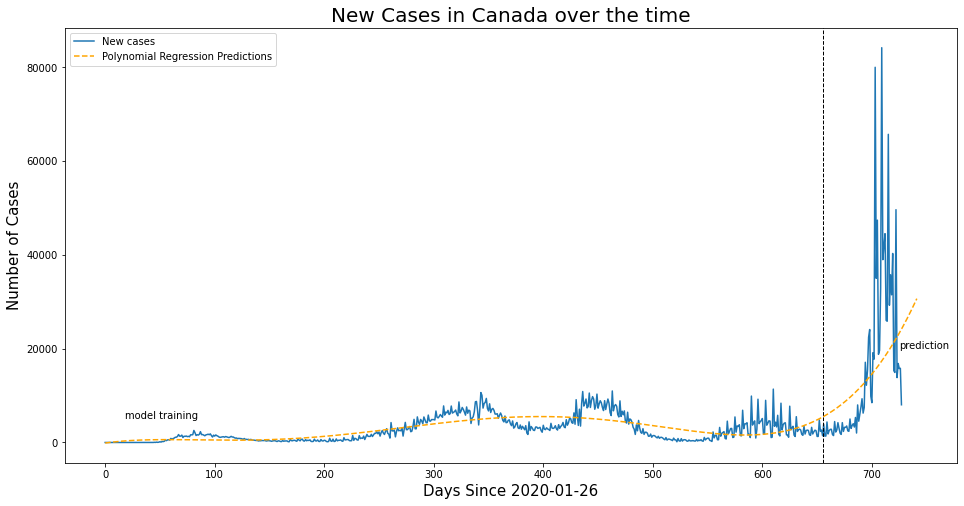

In [26]:
plt.figure(figsize=(16,8))

plt.plot(forecast[:-14], y, label = "New cases")
plt.plot(forecast, linear_pred, label = "Polynomial Regression Predictions", linestyle='dashed', color='orange')

plt.title('New Cases in Canada over the time', size=20)
plt.xlabel('Days Since 2020-01-26', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.axvline(len(X_train), color='black', linestyle="--", linewidth=1)

plt.text(18, 5000, "model training", size = 10, color = "black")

plt.text((len(X_train)+70), 20000, "prediction", size = 10, color = "black")

# defyning legend config
plt.legend(['New cases', 'Polynomial Regression Predictions'])

###Random Forest Regression Model

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. In this project, I will use Regression task.

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [28]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
  

In [29]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1200}

Training, predicting and evaluating polynomial regression into confirmed cases

In [30]:
# Apply the optimal hyperparameters above to the model
RF = RandomForestRegressor(n_estimators = 1200, max_depth = 70,min_samples_split=7, min_samples_leaf=1, max_features='sqrt',bootstrap=False,random_state = 42)
RF.fit(X_train, y_train)
# Predictions
RF_test_pred = RF.predict(X_test)
RF_pred_all = RF.predict(forecast)
# Evaluating with RMSE
RMSE_RF = np.sqrt(mean_squared_error(RF_test_pred, y_test) )
print('RMSE_RF:', RMSE_RF)

RMSE_RF: 21910.874692280588


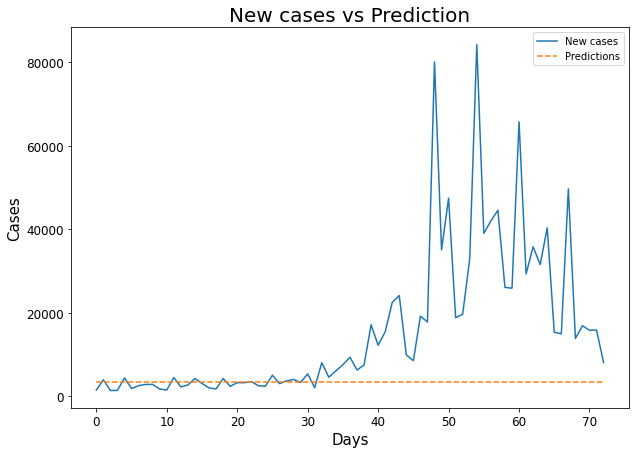

In [31]:
plt.figure(figsize=(10,7))
plt.plot(y_test, label = "New cases")
plt.plot(RF_test_pred, label = "Prediction",linestyle='dashed')
plt.title("New cases vs Prediction", size = 20)
plt.xlabel('Days', size = 15)
plt.ylabel('Cases', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(['New cases', 'Predictions']);

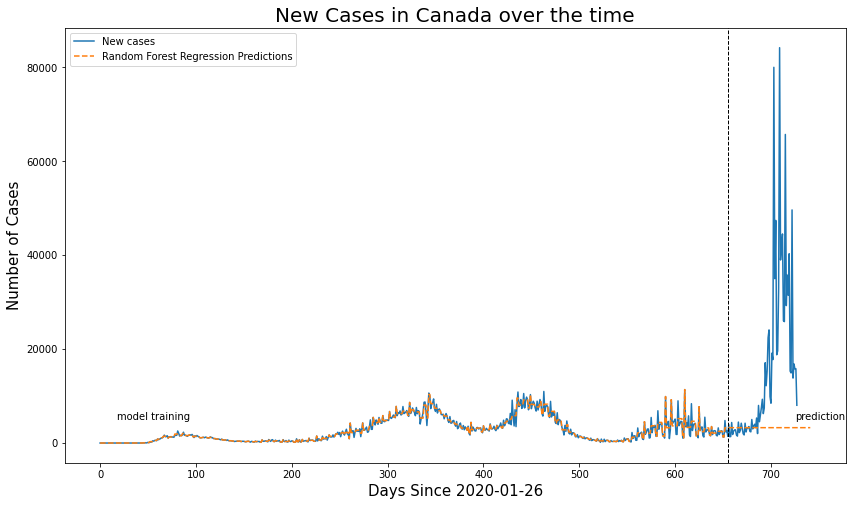

In [32]:
plt.figure(figsize=(14,8))

plt.plot(forecast[:-14], y, label = "New cases")
plt.plot(forecast, RF_pred_all, label = "Random Forest Regression Predictions", linestyle='dashed')

plt.title('New Cases in Canada over the time', size=20)
plt.xlabel('Days Since 2020-01-26', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.axvline(len(X_train), color='black', linestyle="--", linewidth=1)
plt.text(18, 5000, "model training", size = 10, color = "black")
plt.text((len(X_train)+70), 5000, "prediction", size = 10, color = "black")

# defyning legend config
plt.legend(['New cases', 'Random Forest Regression Predictions'])

##**Time Series Forecasting Models**

### Double Exponential Smoothing Model

Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

Additive Trend: Double Exponential Smoothing with a linear trend.

Multiplicative Trend: Double Exponential Smoothing with an exponential trend.

In [33]:
df.set_index('date', inplace=True)
df.head()

,new_cases
date,
2020-01-26,1.00
2020-01-27,0.00
2020-01-28,1.00
2020-01-29,0.00
2020-01-30,0.00


In [34]:
train=df.iloc[:715]
test=df.iloc[715:]

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DESadd14'] = ExponentialSmoothing(df['new_cases'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,new_cases,DESadd14
date,,
2020-01-26,1.00,0.73
2020-01-27,0.00,0.47
2020-01-28,1.00,0.52
2020-01-29,0.00,0.31
2020-01-30,0.00,0.14


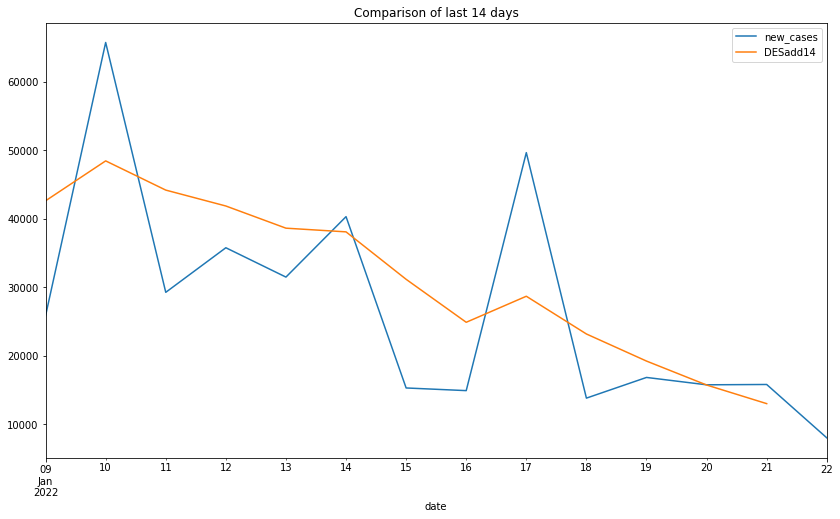

In [36]:
df[['new_cases','DESadd14']].iloc[-14:].plot(figsize=(14,8),title='Comparison of last 14 days').autoscale(axis='x',tight=True);

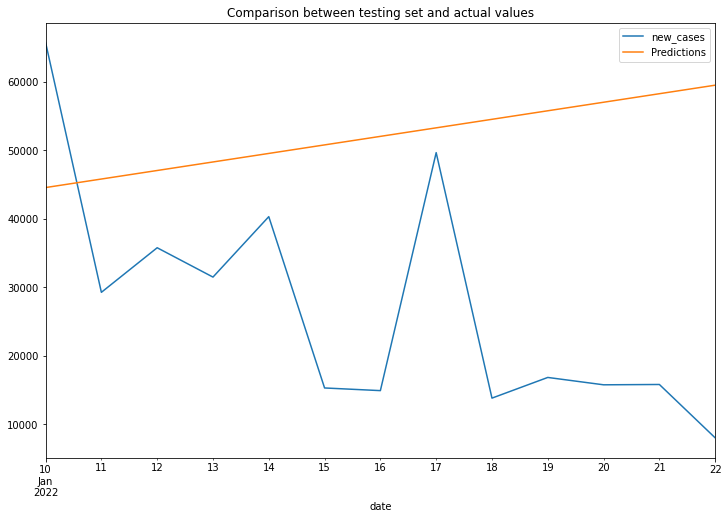

In [37]:
# Building model using Double Exponential smoothing and calculating the rmse.
DE_model = ExponentialSmoothing(train['new_cases'],trend='add').fit()
test_pred = DE_model.forecast(13)
test.plot(legend=True,label='Test',figsize=(12,8),title='Comparison between testing set and actual values')
test_pred.plot(legend=True,label='Predictions');

In [38]:
# Checking the RMSE for Double exponential smoothing
from statsmodels.tools.eval_measures import rmse
RMSE_DE = rmse(test['new_cases'],test_pred)
print('RMSE_DE:', RMSE_DE)

RMSE_DE: 31833.70526601785


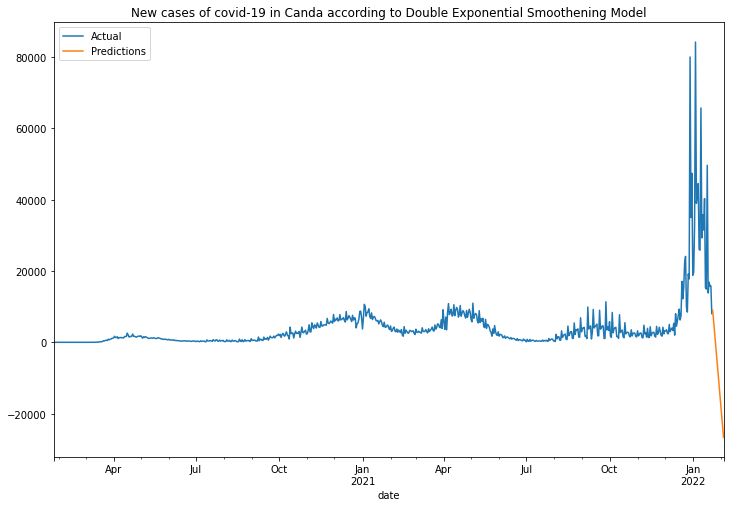

In [39]:
fit_model = ExponentialSmoothing(df['new_cases'],trend='add').fit()
DE_pred = fit_model.forecast(13)
df['new_cases'].plot(legend=True,label='Actual',figsize=(12,8),title='New cases of covid-19 in Canda according to Double Exponential Smoothening Model')
DE_pred.plot(legend=True,label='Predictions')

### Triple Exponential Smoothing Model

Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and seasonality patterns to change over time.

In [40]:
df['TESadd14'] = ExponentialSmoothing(df['new_cases'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df.head()

,new_cases,DESadd14,TESadd14
date,,,
2020-01-26,1.00,0.73,0.14
2020-01-27,0.00,0.47,0.79
2020-01-28,1.00,0.52,0.65
2020-01-29,0.00,0.31,0.23
2020-01-30,0.00,0.14,0.30


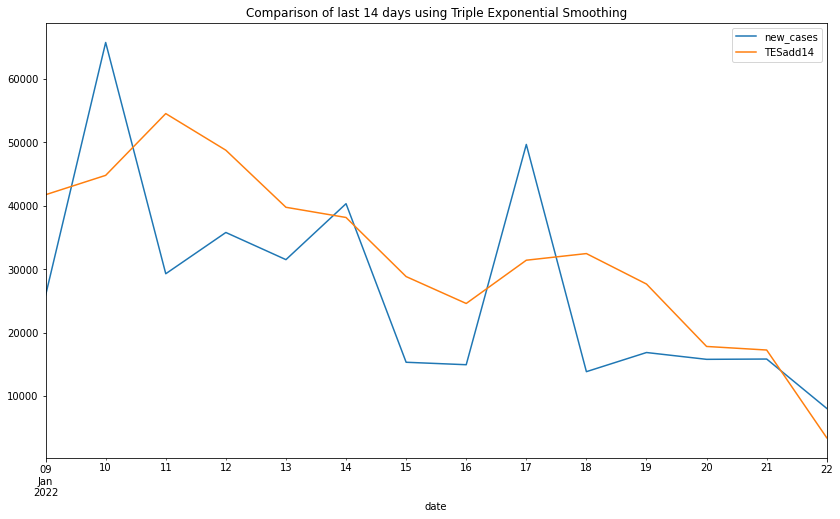

In [41]:
df[['new_cases','TESadd14']].iloc[-14:].plot(figsize=(14,8),title='Comparison of last 14 days using Triple Exponential Smoothing').autoscale(axis='x',tight=True);

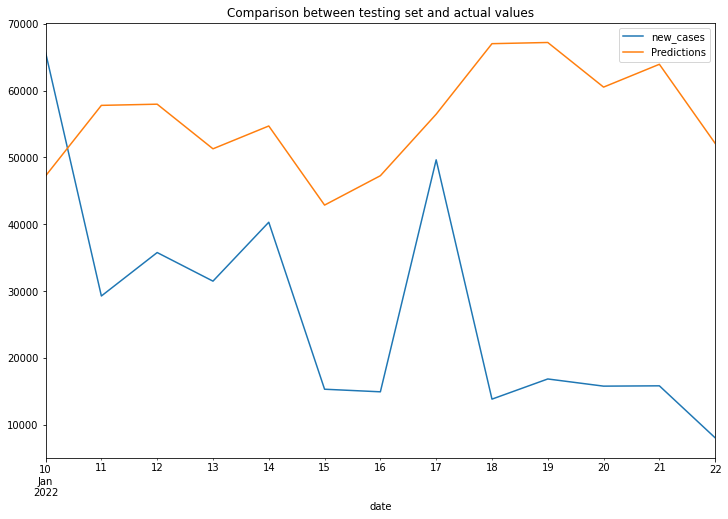

In [42]:
# Building model using Triple Exponential Smoothing
TE_model = ExponentialSmoothing(train['new_cases'],trend='add',seasonal='add').fit()
TE_test_pred = TE_model.forecast(13)
test.plot(legend=True,label='Test',figsize=(12,8),title='Comparison between testing set and actual values')
TE_test_pred.plot(legend=True,label='Predictions');

In [43]:
# Checking the RMSE for Triple exponential smoothing
RMSE_TE = rmse(test['new_cases'],TE_test_pred)
print(RMSE_TE)

34780.509307480716


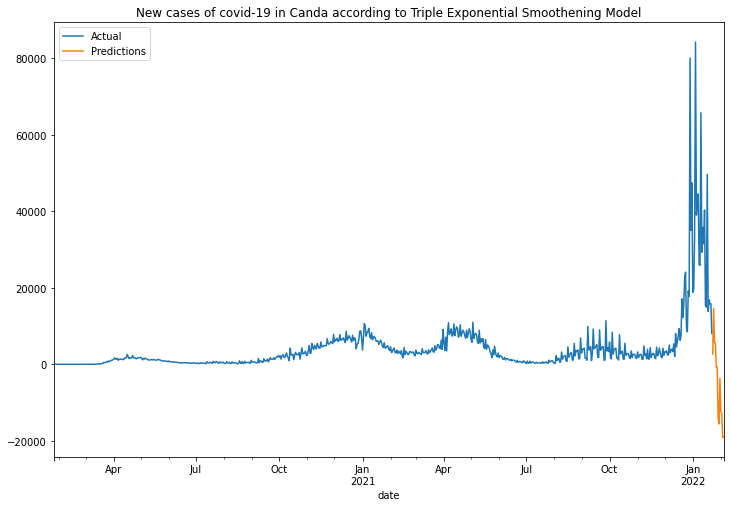

In [44]:
fit_model = ExponentialSmoothing(df['new_cases'],trend='add',seasonal='add').fit()
TE_pred = fit_model.forecast(13)
df['new_cases'].plot(legend=True,label='Actual',figsize=(12,8),title='New cases of covid-19 in Canda according to Triple Exponential Smoothening Model')
TE_pred.plot(legend=True,label='Predictions');

###ARIMA model

Time Series Forecasting with Arima (Autoregressive Integrated Moving Average)
With the notation ARIMA(p, d, q), ARIMA models are denoted. The seasonality, pattern, and noise in the data account for these three parameters

In [45]:
!pip install pmdarima

In [46]:
from pmdarima import auto_arima

In [47]:
# Create a function to check data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):   
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [48]:
adf_test(df['new_cases'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.85
p-value                  0.36
# lags used             19.00
# observations         708.00
critical value (1%)     -3.44
critical value (5%)     -2.87
critical value (10%)    -2.57
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [49]:
from statsmodels.tsa.statespace.tools import diff
df['d1'] = diff(df['new_cases'],k_diff=1)

adf_test(df['d1'],'')

Augmented Dickey-Fuller Test: 
ADF test statistic      -7.75
p-value                  0.00
# lags used             20.00
# observations         706.00
critical value (1%)     -3.44
critical value (5%)     -2.87
critical value (10%)    -2.57
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [50]:
df.head()

,new_cases,DESadd14,TESadd14,d1
date,,,,
2020-01-26,1.00,0.73,0.14,NaN
2020-01-27,0.00,0.47,0.79,-1.00
2020-01-28,1.00,0.52,0.65,1.00
2020-01-29,0.00,0.31,0.23,-1.00
2020-01-30,0.00,0.14,0.30,0.00


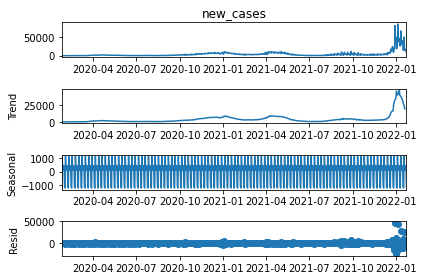

In [52]:
import matplotlib
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['new_cases'],model='additive')
fir = decomposition.plot()
matplotlib.rcParams['figure.figsize']=[10.0,7.0]

Here we can see that trend is significantly going up in Jan 2022, then drop after that. The increase in the number of the cases can be attributed to some of the severly affected by new variant Omicron.

The sesonality shows us a sinusoidal trend which can be attributed to continous increasing trend in the number of confirmed cases.

we can see some noise components in later months of Dec 2021 and Jan 2022 which can be attributed to poorly affected by new variant Omicron.

In [53]:
train=df.iloc[:715]
valid=df.iloc[715:]

In [54]:
# Auto Arima Model
ARIMA_model = auto_arima(train['new_cases'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(ARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13760.196, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14026.310, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13862.833, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13760.184, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14024.358, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13756.461, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13750.918, Time=1.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13748.700, Time=1.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13760.415, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13547.114, Time=4.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13724.610, Time=0.72 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13585.940, Time=4.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.41 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=13546.347, Time=2.47 sec
 ARIMA(2,1,2)(0,0,0)[0]  

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
best_model = SARIMAX(train['new_cases'],order=(3,1,2),seasonal_order=(0,0,0,0))
results = best_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              new_cases   No. Observations:                  715
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6767.173
Date:                Thu, 07 Apr 2022   AIC                          13546.347
Time:                        04:50:23   BIC                          13573.772
Sample:                    01-26-2020   HQIC                         13556.938
                         - 01-09-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6852      0.016     44.025      0.000       0.655       0.716
ar.L2         -0.2282      0.010    -23.522      0.000      -0.247      -0.209
ar.L3         -0.4176      0.012    -33.562      0.000      -0.442      -0.393
ma.L1         -1.5765      0.013   -119.862      0.000      -1.602      -1.551
ma.L2          0.9096      0.012     74.420      0.000       0.886       0.934
sigma2      1.053e+07   3.63e-09    2.9e+15      0.000    1.05e+07    1.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):            751302.93
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):             568.21   Skew:                             8.61
Prob(H) (two-sided):                  0.00   Kurtosis:                       160.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+30. Standard errors may be unstable.
"""

In [74]:
start=len(train)
end=len(train)+len(valid)-1
ARIMA_pred = results.predict(start=start, end=end, dynamic=False,typ='levels').rename('SARIMA(3, 1, 2)(0,0,0,0) Predictions')

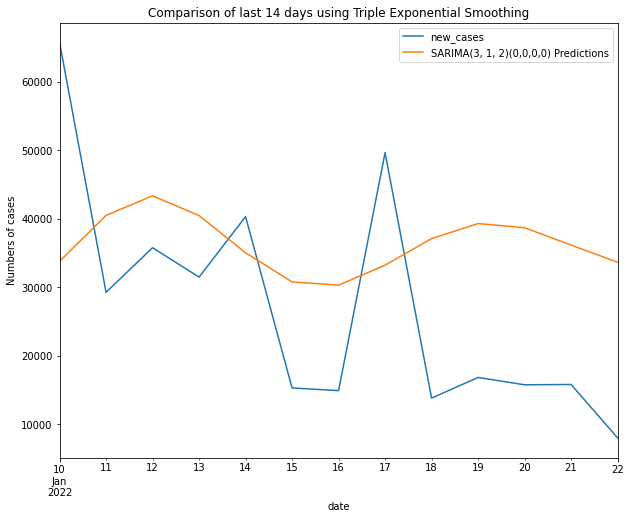

In [75]:
title='Comparison of last 14 days using Triple Exponential Smoothing'
ylabel='Numbers of cases'
ax = valid['new_cases'].plot(legend=True,figsize=(10,8),title=title)
ARIMA_pred.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [76]:
# Checking the RMSE for SARIMA
RMSE_ARIMA = rmse(test['new_cases'], ARIMA_pred)
print(RMSE_ARIMA)

19007.6804181786


## Comparing model scores

In [77]:
models = ["Polynomial Regression","Random Forest Regression","Double Exponential Smoothing","Triple Exponential Smoothing","ARIMA"]
x = [RMSE_poly, RMSE_RF, RMSE_DE, RMSE_TE, RMSE_ARIMA]
eval_frame = pd.DataFrame()
eval_frame['Model'] = models
eval_frame['Root Mean Squared Error'] = x
eval_frame = eval_frame.sort_values(["Root Mean Squared Error"])
eval_frame.style.background_gradient(cmap='Reds')

,Model,Root Mean Squared Error
0,Polynomial Regression,15566.393572
4,ARIMA,19007.680418
1,Random Forest Regression,21910.874692
2,Double Exponential Smoothing,31833.705266
3,Triple Exponential Smoothing,34780.509307


The lower RMSE, the better model. As RMSE for ARIMA model is less than that of other models (except Polynomial Regression). However, considered this dataset is time series dataset, so I will proceed ahead with ARIMA model to predict.

In [61]:
final_model = SARIMAX(df['new_cases'],order=(3, 1, 2),seasonal_order=(0,0,0,0))
result = final_model.fit()
SARIMA_forecast = result.predict(len(df),len(df)+13)
SARIMA_forecast

2022-01-23   18,302.02
2022-01-24   16,369.38
2022-01-25   17,577.97
2022-01-26   15,126.53
2022-01-27   17,331.09
2022-01-28   15,673.94
2022-01-29   17,121.62
2022-01-30   15,799.91
2022-01-31   16,956.94
2022-02-01   15,953.95
2022-02-02   16,832.90
2022-02-03   16,060.97
2022-02-04   16,736.99
2022-02-05   16,145.24
Freq: D, Name: predicted_mean, dtype: float64

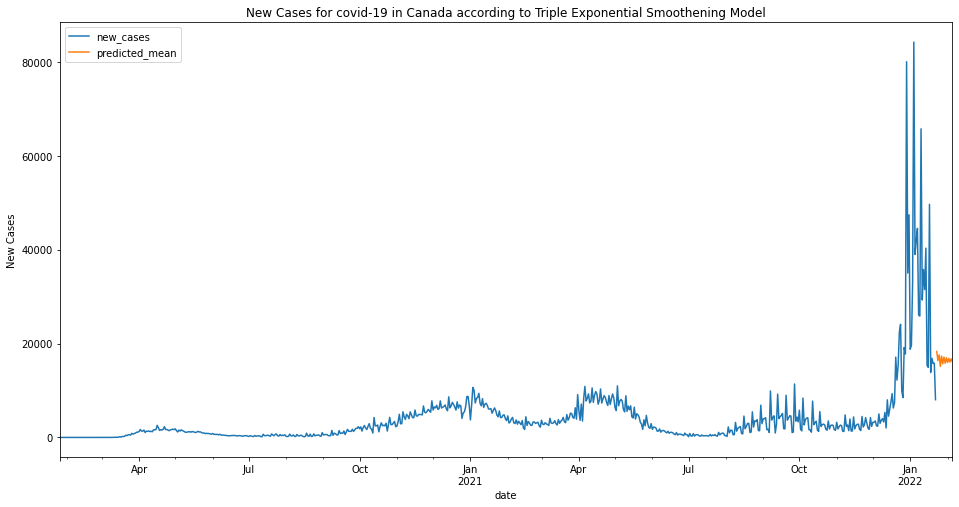

In [62]:
title='New Cases for covid-19 in Canada according to Triple Exponential Smoothening Model'
ylabel='New Cases'
ax = df['new_cases'].plot(legend=True,figsize=(16,8),title=title)
SARIMA_forecast.plot(legend=True);
ax.autoscale(axis='x',tight=True);
ax.set(ylabel=ylabel);

In [63]:
# Creating a new DataFrame for new cases in Canada and predicting next 14days.
date_start = '2020-01-27'
date_end = '2022-02-06'
newdate = pd.date_range(date_start,date_end).tolist()
len(newdate)

742

In [64]:
columns=['date','new_cases']
final = pd.DataFrame(columns=columns)
final['date']=newdate
final['new_cases']=df['new_cases']
final.tail()

,date,new_cases
737,2022-02-02,NaN
738,2022-02-03,NaN
739,2022-02-04,NaN
740,2022-02-05,NaN
741,2022-02-06,NaN


In [65]:
final.index=final['date']
final.drop(['date'],axis=1,inplace=True)

In [72]:
for i in range(14):
    final.loc[728+i:,'new_cases']=SARIMA_forecast[i]

In [73]:
final=final.round()
final.tail(14)

,new_cases
date,
2022-01-24,"18,302.00"
2022-01-25,"16,369.00"
2022-01-26,"17,578.00"
2022-01-27,"15,127.00"
2022-01-28,"17,331.00"
2022-01-29,"15,674.00"
2022-01-30,"17,122.00"
2022-01-31,"15,800.00"
2022-02-01,"16,957.00"


The number of new cases in Canada from Jan 24,2022 to Feb 06,2022 were predicted to fluctuate around 15,000 to 18,000 cases per day according to ARIMA model.